# Pyber Challenge
### Bryan Kuropatwa


### 4.3 Loading and Reading CSV files

In [3]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [265]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


## Deliverable 1: Get a Summary DataFrame 

In [220]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby("type").count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [221]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby("type").sum()["driver_count"]
total_drivers
# There are duplicate entries in pyber_data_df which I can't eliminate after the left join.  Using city_data_df instead.

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [222]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby("type").sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [223]:
#  4. Get the average fare per ride for each city type. 
avg_ride_fare = pyber_data_df.groupby("type").sum()["fare"] / pyber_data_df.groupby("type").count()["ride_id"]
avg_ride_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [224]:
# 5. Get the average fare per driver for each city type. 
avg_driver_fare = pyber_data_df.groupby("type").sum()["fare"] / city_data_df.groupby("type").sum()["driver_count"]

#avg_driver_fare2 = round(pyber_data_df.sum()["fare"] / pyber_data_df.sum()["driver_count"] , 2)
avg_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [225]:
#  6. Create a PyBer summary DataFrame.
pyber_summary_df = pd.DataFrame({'Total Rides':total_rides.values, 'Total Drivers':total_drivers.values, 'Total Fares':total_fares.values, 'Average Fare per Ride':avg_ride_fare.values, 'Average Fare per Driver':avg_driver_fare})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [226]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [227]:
#  8. Format the columns.
format_dict = {'Total Rides':'{0:,.0f}', 'total_drivers':'{0:,.0f}', 'Total Fares':'${0:,.2f}', 'Average Fare per Ride':'${0:,.2f}', 'Average Fare per Driver':'${0:,.2f}'}
pyber_summary_df.style.format(format_dict)


,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,"1,625",2405,"$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [266]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [267]:
# Format the date from object --> datetime (--> date)
pyber_data_df['date'] = pd.to_datetime(pyber_data_df['date'])
pyber_data_df['date']

0      2019-01-14 10:14:22
1      2019-03-04 18:24:09
2      2019-02-24 04:29:00
3      2019-02-10 23:22:03
4      2019-03-06 04:28:35
               ...        
2370   2019-04-29 17:04:39
2371   2019-01-30 00:05:47
2372   2019-02-10 21:03:50
2373   2019-05-07 19:22:15
2374   2019-04-25 10:20:13
Name: date, Length: 2375, dtype: datetime64[ns]

In [269]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
sum_fares_df = pyber_data_df.groupby(["type","date"]).sum()["fare"]
sum_fares_df

type   date               
Rural  2019-01-01 09:45:36    43.69
       2019-01-02 11:18:32    52.12
       2019-01-03 19:51:01    19.90
       2019-01-04 03:31:26    24.88
       2019-01-06 07:38:40    47.33
                              ...  
Urban  2019-05-08 04:20:00    21.99
       2019-05-08 04:39:49    18.45
       2019-05-08 07:29:01    18.55
       2019-05-08 11:38:35    19.77
       2019-05-08 13:10:18    18.04
Name: fare, Length: 2375, dtype: float64

In [270]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_data_df = pyber_data_df.reset_index()

In [271]:
pyber_data_df.index.name = None
pyber_data_df.head()

,index,city,date,fare,ride_id,driver_count,type
0,0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [272]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date.

fare_table = np.round(pd.pivot_table(data=pyber_data_df,index=['date'],columns=['type'],values=['fare']), 2)
fare_table

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-05-08 04:20:00   NaN      NaN  21.99
2019-05-08 04:39:49   NaN      NaN  18.45
2019-05-08 07:29:01   NaN      NaN  18.55
2019-05-08 11:38:35   NaN      NaN  19.77
2019-05-08 13:10:18   NaN      NaN  18.04

[2375 rows x 3 columns]

In [273]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
fare_table.index=pd.to_datetime(fare_table.index)
# Makes the index searchable.  

early_fares = fare_table.loc['2019-01-01':'2019-04-28']
early_fares

fare                
type                Rural Suburban  Urban
date                                     
2019-01-01 00:08:16   NaN      NaN  37.91
2019-01-01 00:46:46   NaN    47.74    NaN
2019-01-01 02:07:24   NaN    24.07    NaN
2019-01-01 03:46:50   NaN      NaN   7.57
2019-01-01 05:23:21   NaN      NaN  10.75
...                   ...      ...    ...
2019-04-28 14:28:36   NaN      NaN  11.46
2019-04-28 16:29:16   NaN      NaN  36.42
2019-04-28 17:26:52   NaN      NaN  31.43
2019-04-28 17:38:09   NaN    34.87    NaN
2019-04-28 19:35:03   NaN    16.96    NaN

[2196 rows x 3 columns]

In [242]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
# Used above to achieve step 5.

In [274]:
# 7. Check that the datatype for the index is datetime using df.info()
early_fares.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (fare, Rural)     114 non-null    float64
 1   (fare, Suburban)  573 non-null    float64
 2   (fare, Urban)     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [397]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
#format_dict = {'Rural':'${0:,.2f}', 'Suburban':'${0:,.2f}', 'Urban':'${0:,.2f}'}

week_fares = early_fares.resample('W').sum()
week_fares["fare"]["Rural"]

date
2019-01-06    187.92
2019-01-13     67.65
2019-01-20    306.00
2019-01-27    179.69
2019-02-03    333.08
2019-02-10    115.80
2019-02-17     95.82
2019-02-24    419.06
2019-03-03    175.14
2019-03-10    303.94
2019-03-17    163.39
2019-03-24    189.76
2019-03-31    199.42
2019-04-07    501.24
2019-04-14    269.79
2019-04-21    214.14
2019-04-28    191.85
Freq: W-SUN, Name: Rural, dtype: float64

<AxesSubplot:xlabel='date'>

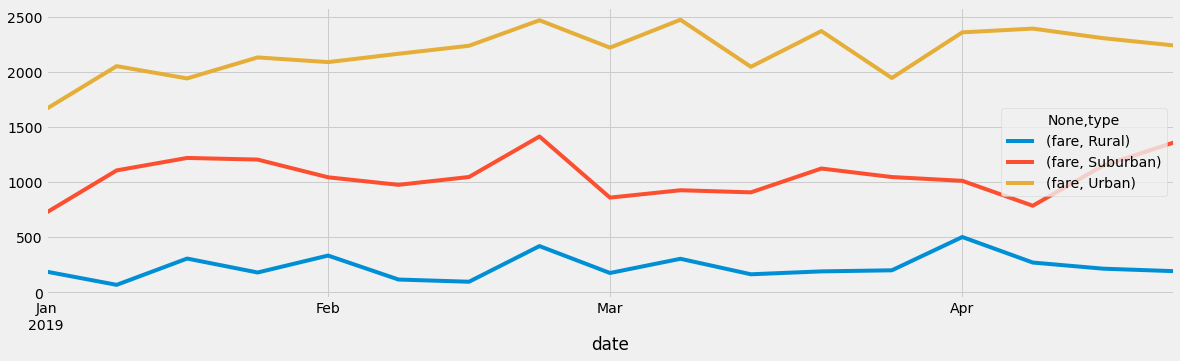

In [400]:
# 9. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
style.use('fivethirtyeight')



week_fares.plot(figsize=(18,5),)


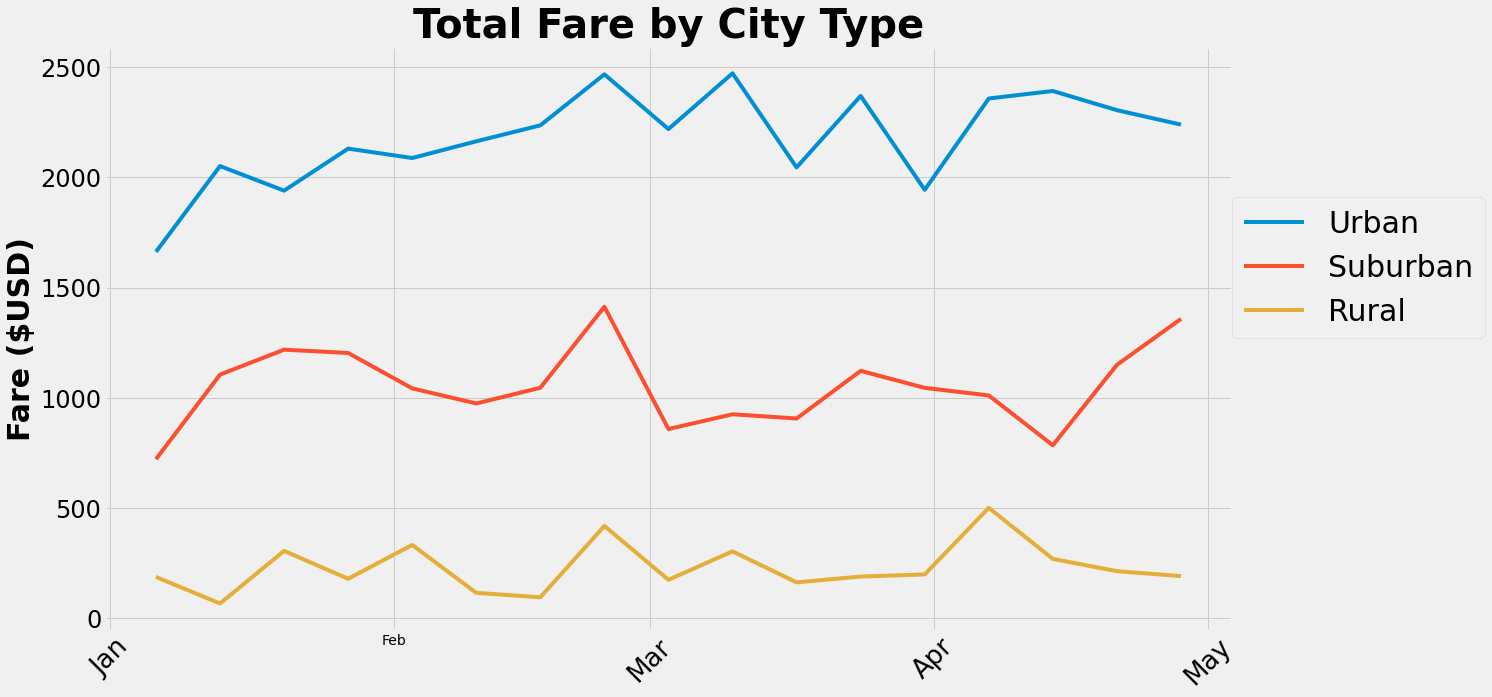

In [431]:
import matplotlib.dates as mdates

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig, ax = plt.subplots()

ax.set_title("Total Fare by City Type", size = 40, fontweight="bold")
ax.set_ylabel("Fare ($USD)", size = 30, fontweight="bold")

# Set the locator
locator = mdates.MonthLocator()  # every month
month_ticks = ["Jan.", "Feb.", "Mar.", "Apr."]

# Specify the format - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)

plt.xticks(rotation=45, size = 26)
#plt.xticks(range(4),month_ticks)
plt.yticks(size = 24)

fig.set_size_inches(18, 10, forward=True)

ax.plot(week_fares.index.values, week_fares["fare"]["Urban"])
ax.plot(week_fares.index.values, week_fares["fare"]["Suburban"])
ax.plot(week_fares.index.values, week_fares["fare"]["Rural"])
plt.legend(['Urban','Suburban', 'Rural'],  loc = (1,0.5), prop={"size":30})
plt.savefig('analysis/Pyber_fare_summary.png');